# Trabajo Práctico N1. Procesamiento de Imágenes

# Ejercicio 1

Inicialmente, conocemos la densidad de conos por sensor $$\delta_c=150000 \frac{conos}{mm^2}$$ y, sabiendo que el sensor posee un área de $$A_s=1.5mm\cdot1.5mm=2.25mm^2$$ obtenemos un total de conos por sensor de :$$A_s\cdot\delta_c = 2.25mm^2 \cdot 150000 \frac{conos}{mm^2} = 337500$$ Luego dividiendo el área total del sensor por la cantidad de conos obtenemos el área de un cono $A_c$ : $$A_c = \frac{A_s}{\#c} = \frac{1}{150000}mm^2\approx 6,67\cdot10^{-6}mm^2$$
Conociendo este valor pasamos a la situación planteada, en la que se intenta resolver entre objetos ubicados a una distancia de $D=30cm$. Usamos el esquema presentado en clase para determinar la altura con la que se proyecta una imagen en la retina según: 

![Getting Started](Distanciafocal.png)

$\frac{H}{D}=\frac{h}{f}$ 
donde f será la distancia focal del ojo. Si interpretamos que la máxima resolución admisible se da entre dos puntos que se proyectan a una distancia igual al alto de un cono, podemos entonces tomar $h=\sqrt{A_c}\approx2.58x10^{-3}mm$ para el peor caso. Sobre la distancia focal, se toma el valor que resulta de sumar las potencias ópticas de la córnea con la de la lente (las dos interfases principales que atraviesan los rayos de luz) $\frac{1}{f_{ojo}}=\frac{1}{f_{cornea}}\cdot\frac{1}{f_{lente}}$ de donde, si tomamos los valores aceptados para cada uno como $\frac{1}{f_{cornea}}=43D$ y
$\frac{1}{f_{lente}}\approx16D$ obtenemos un valor de $f_{ojo} \approx 1.69cm$.
Entonces, despejamos H como la separación máxima entre dos puntos que se puede resolver reemplazando: $H=\frac{h\cdot D}{f_{ojo}}\approx 45.8\mu m$
Así, si asumimos que la visión es uniforme en cuanto a resolución espacial vertical y horizontal podemos definir que el pixel mas pequeño en una pantalla LCD perceptible sería de 
$x= 45.8\mu m$
Si consideramos el valor minimo que se puede obtener de distancia focal como d=14mm, entonces
$x = 55.32 \mu m\;\; , d = 14mm$

# Ejercicio 2

Se tiene 1Mpixel, por lo tanto el CCD tiene 1000x1000 pixeles, dado que es cuadrado. 

$\frac{h'}{1m} = \frac{hpix}{35mm}$

$hpix = \frac{10mm}{1000}$

$h = 285.7\mu$

# Ejercicio 3

Para medir la resolución real de una cámara, en este caso un celular, y compararla con su valor comercial, diseñamos un experimento utilizando un ábaco de referencia. Fotografiamos el ábaco a dos condiciones diferentes: con la cámara fija (apoyada o en trípode) y sosteniendo la cámara con las manos. Mantuvimos constante el nivel de iluminación y consideramos la resolución de la impresora en relación a la distancia de fotografiado.

Medimos las separaciones entre las líneas en el ábaco de referencia, en este caso, entre las líneas delimitadas por los números 8 y 9. En ese espacio, se midio sobre la impresión la cantidad de líneas por milímetro, midiendose un valor aproximado de $1.67 \frac{lp}{mm}$. A partir de eso, utilizando la longitud de diagonal del sensor obtenido del fabricante de 10.26 mm, calculamos la resolución en megapíxeles (MP) aproximada.
Resolución en píxeles por milímetro: 
Resolucion en líneas por milímetro × Longitud de la diagonal del sensor$$ = 1.67 \frac{lp}{mm} × 10.26 mm = 17.15 \frac{px}{mm}$$

Del fabricante también sacamos el dato del área del sensor que es igual a 50.5 mm² .
Entonces, calculamos el área del sensor en píxeles = Área del sensor en mm² × Resolución en píxeles por milímetro $$50.5 mm² × 17.15 \frac{px}{mm} = 866.075 px²$$Como la imagen fue tomada en una resolución en píxeles de 4000 x 3000 píxeles, ajustaremos a este valor. Siguiendo estos datos, obtenemos una resolución estimada de aproximadamente 10.26 MP para la cámara, lo cual se encuentra bastante cerca a los 12MP que nominalmente posee la cámara. Las diferencias se pueden deber a imprecisiones en las mediciones, redondeos y hasta incluso que las condiciones de medición utilizadas hayan sido suficientemente ideales. 
![Getting Started](isopic.jpg)

Como comentario final, no se observaron diferencias medibles entre la foto tomada con tripode y la foto tomada "a mano alzada" (asistida por estabilizacion optica y electrónica), lo que nos marca un buen desempeño en ese aspecto, ya que seria esperable que debido a una menor cantidad de movimiento ofrecida por el tripode, deberia mejorar la captura de detalles finos aunque en este caso no fue perceptible.

In [1]:
!pip install opencv-python matplotlib numpy scipy


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 4

Generamos las 2 imagenes, entendiendo que en una imagen RGB, si R=G=B, el color será negro, gris o blanco.

In [3]:
def generate(background: int, foreground: int):
    gen = np.full((3, 3, 3), (background,)*3, dtype=np.uint8)
    gen[1, 1, :] = (foreground,) *3 
    return gen

(-0.5, 2.5, 2.5, -0.5)

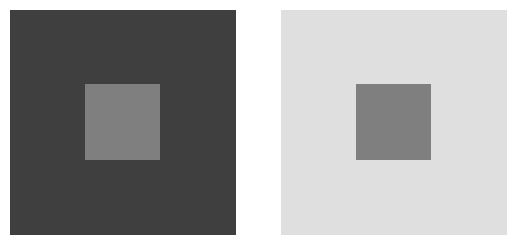

In [4]:
pixel_central = 127

dark = generate(63, pixel_central)
light = generate(223, pixel_central)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dark)
ax2.imshow(light)

ax1.axis('off')
ax2.axis('off')

Ahora probamos con distintos valores de luminancia en el pixel central hasta que empíricamente tengan el mismo brillo. Manteniendo constante el valor del pixel del fondo blanco.

(-0.5, 2.5, 2.5, -0.5)

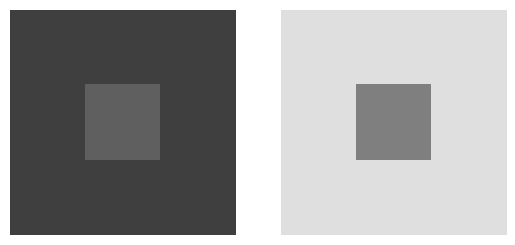

In [5]:
pixel_central = 127
dark_pixel = 95

dark = generate(63, dark_pixel)
light = generate(223, pixel_central)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dark)
ax2.imshow(light)

ax1.axis('off')
ax2.axis('off')

Con un valor de $95$ llegamos al valor que hace que luzcan iguales. Esto se puede explicar con la Ley de Weber, ya que se tuvo que oscurecer el pixel central para que no haga mucho contraste con el fondo y parezca las brillante.

# Ejercicio 5

Text(0.5, 1.0, 'Original')

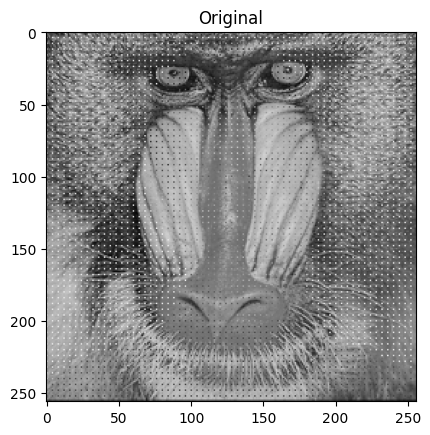

In [6]:
mono_img = cv2.imread("mono.bmp")

plt.imshow(mono_img)
plt.title('Original')

In [7]:
def sample(offset_x: int, offset_y: int):
    return mono_img[offset_x::4, offset_y::4, :]

## Item B


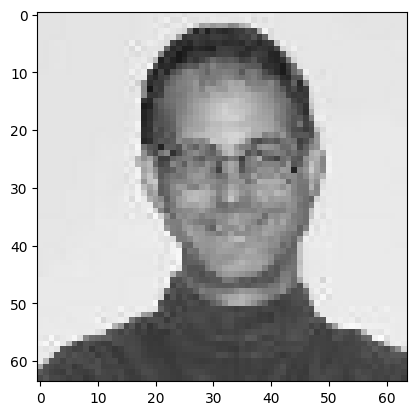

In [8]:
sample_0 = sample(0, 0)
plt.imshow(sample_0)

## Item A

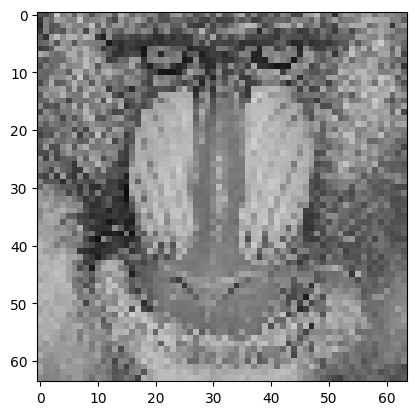

In [9]:
sample_1 = sample(1, 1)
plt.imshow(sample_1)

## Item C

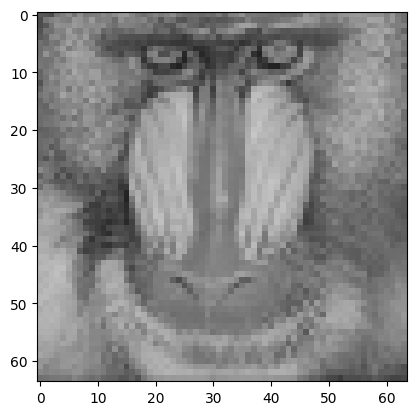

In [10]:
average = sum(sample(x, y).astype(np.int64) for x in range(4) for y in range(4)) / 16
average = average.astype(np.uint8)
plt.imshow(average)

In [11]:
orig = np.array([
    [[0, 255, 0], [100, 0, 255], [255, 50, 0]], 
    [[0, 0, 255], [100, 100, 100], [0, 0, 0]], 
    [[255, 255, 255], [255, 0, 255], [0, 255, 100]]
], dtype=np.uint8)

def show_side_by_side_images(imgs, titles):
    assert len(imgs) == len(titles)
    count = len(imgs)
    fig, axes = plt.subplots(1, count)
    for ax, img, title in zip(axes, imgs, titles):
        ax.imshow(img)
        ax.title.set_text(title)
        ax.axis('off')
    plt.tight_layout()

def showcase_our_implementation(fn, opencv_fn):
    out_res = (90, 90)
    our = fn(orig, out_res)
    opencv = opencv_fn(orig, (out_res[0] * 4 // 3, out_res[1] * 4 // 3))[out_res[0]*2//9:-out_res[0]*2//9, out_res[1]*2//9:-out_res[1]*2//9, :]

    show_side_by_side_images((orig, our, opencv), ("Original", "Nuestra", "OpenCV"))

## Implementacion Bilineal

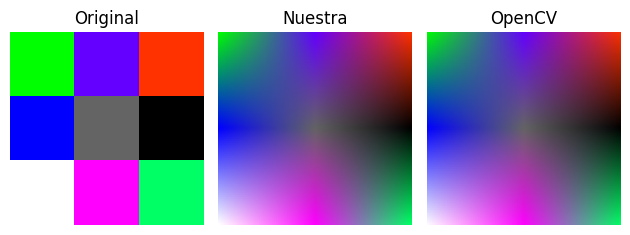

In [12]:
def bilineal_sample(img, x, y):
    x1, y1 = int(np.floor(x)), int(np.floor(y))
    # x2, y2 = int(np.ceil(x)), int(np.ceil(y))
    x2 = x1 + 1
    y2 = y1 + 1

    if x2 >= img.shape[1]:
        x1 -= 1
        x2 -= 1

    if y2 >= img.shape[0]:
        y1 -= 1
        y2 -= 1

    # print(x1, y1, x2, y2)

    # square = np.array([[img[y1, x1], img[y1, x2]], [img[y2, x1], img[y2, x2]]])
    square = img[y1:y2 + 1, x1:x2 + 1].astype(np.float32)

    res= np.array([[y2 - y, y - y1]]) @ square @ np.array([[x2 - x], [x - x1]])
    return res.astype(np.uint8)

def bilineal(img, new_size):
    height, width = img.shape[:-1]
    original_height, original_width = new_size

    f = np.vectorize(lambda y, x, c: bilineal_sample(img[:,:,int(c)], x * (width - 1) / (original_width - 1), y * (height - 1) / (original_height - 1)))

    ours = np.fromfunction(f, new_size + (img.shape[2],))

    # return np.abs(ours.astype(np.int16) - cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR).astype(np.int16)).astype(np.uint8)
    return ours


showcase_our_implementation(bilineal, lambda img,size:cv2.resize(img, dsize=size, interpolation=cv2.INTER_LINEAR))

## Implementacion Bicubica

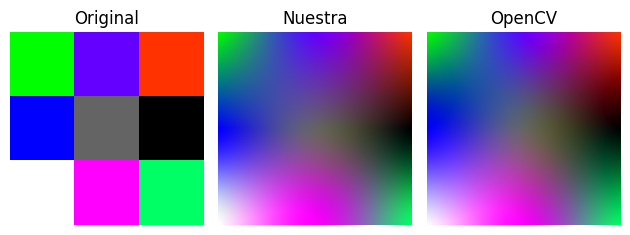

In [13]:
def bicubic_sample(f, fx, fy, fxy, x, y):
    x1, y1 = int(np.floor(x)), int(np.floor(y))
    # x2, y2 = int(np.ceil(x)), int(np.ceil(y))
    x2 = x1 + 1
    y2 = y1 + 1

    if x2 >= f.shape[1]:
        x1 -= 1
        x2 -= 1

    if y2 >= f.shape[0]:
        y1 -= 1
        y2 -= 1

    x = x - x1
    y = y - y1


    left = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [-3, 3, -2, -1], [2, -2, 1, 1]])
    right = np.array([[1, 0, -3, 2], [0, 0, 3, -2], [0, 1, -2, 1], [0, 0, -1, 1]])

    f = f[y1:y2+1, x1:x2+1]
    fx = fx[y1:y2+1, x1:x2+1]
    fy = fy[y1:y2+1, x1:x2+1]
    fxy = fxy[y1:y2+1, x1:x2+1]

    fs = np.array([
        [f[0, 0], f[0, 1], fx[0, 0], fx[0, 1]],
        [f[1, 0], f[1, 1], fx[1, 0], fx[1, 1]],
        [fy[0, 0], fy[0, 1], fxy[0, 0], fxy[0, 1]],
        [fy[0, 0], fy[0, 1], fxy[0, 0], fxy[0, 1]],
    ])

    alpha = left @ fs @ right

    return np.array([1, y, y*y, y*y*y]) @ alpha @ np.array([[1], [x], [x*x], [x*x*x]])



def bicubic(img, new_size):
    height, width = img.shape[:-1]
    original_height, original_width = new_size

    img = img.astype(np.float64)
    dx = np.zeros_like(img)
    dx[:, 1:-1, :] = (img[:, 2:, :] - img[:, :-2, :]) / 2
    dx[:, 0, :] = img[:, 1, :] - img[:, 0, :]
    dx[:, -1, :] = img[:, -1, :] - img[:, -2, :]

    dy = np.zeros_like(img)
    dy[1:-1, :, :] = (img[2:, :, :] - img[:-2, :, :]) / 2
    dy[0, :, :] = img[1, :, :] - img[0, :, :]
    dy[-1, :, :] = img[-1, :, :] - img[-2, :, :]

    dxy = np.zeros_like(img)
    dxy[:, 1:-1, :] = (dy[:, 2:, :] - dy[:, :-2, :]) / 2
    dxy[:, 0, :] = dy[:, 1, :] - dy[:, 0, :]
    dxy[:, -1, :] = dy[:, -1, :] - dy[:, -2, :]

    f = np.vectorize(lambda y, x, c: bicubic_sample(img[:,:,int(c)], dx[:,:,int(c)], dy[:,:,int(c)], dxy[:,:,int(c)], x * (width - 1) / (original_width - 1), y * (height - 1) / (original_height - 1)))

    ours = np.fromfunction(f, new_size + (img.shape[2],))

    # return np.abs(ours.astype(np.int16) - cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR).astype(np.int16)).astype(np.uint8)
    return np.clip(ours, 0, 255).astype(np.uint8)


showcase_our_implementation(bicubic, lambda img,size:cv2.resize(img, dsize=size, interpolation=cv2.INTER_CUBIC))

In [14]:
original_size = mono_img.shape[:-1]

def to_3channels(img):
    rgb = np.zeros(img.shape + (3,), dtype=img.dtype)
    rgb[:, :, 0] = img
    rgb[:, :, 1] = img
    rgb[:, :, 2] = img
    return rgb

def interpolate(img):
    show_side_by_side_images((img, bilineal(img, original_size), bicubic(img, original_size)), ("Original", "Bilineal", "Bicubica"))


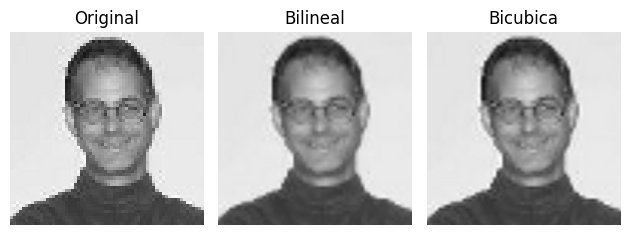

In [15]:
interpolate(sample_0)

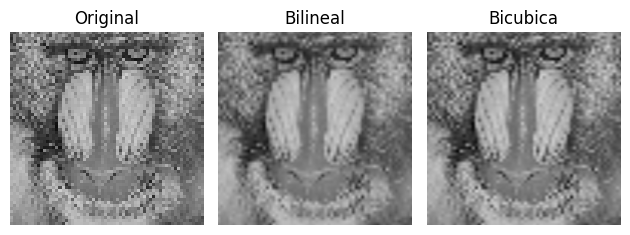

In [16]:
interpolate(sample_1)

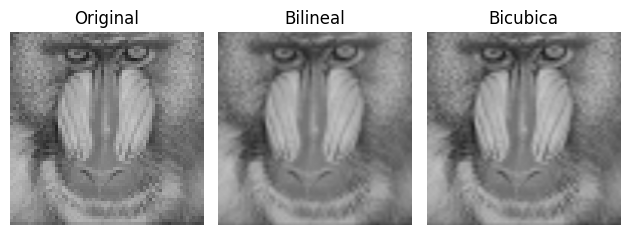

In [17]:
interpolate(average)

In [18]:
from scipy.fft import fft2, fftshift

def plot_FFT2D(sample):
    image_fft = fftshift(fft2(sample[:,:,0]))
    magnitud_spectrum = np.abs(image_fft)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap='gray')
    plt.title('Imagen original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(np.log(1 + magnitud_spectrum), cmap='gray')
    plt.title('Magnitud (log)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


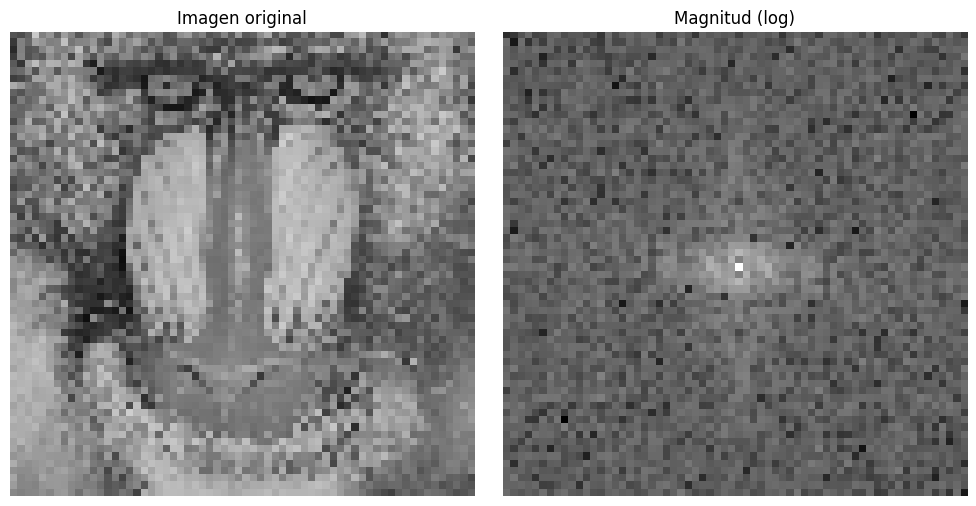

In [19]:
plot_FFT2D(sample_1)

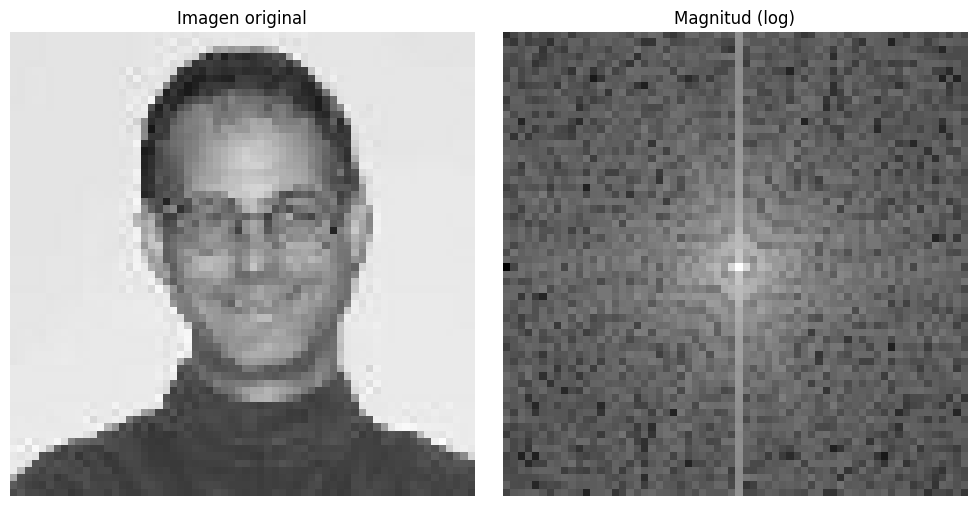

In [20]:
plot_FFT2D(sample_0)

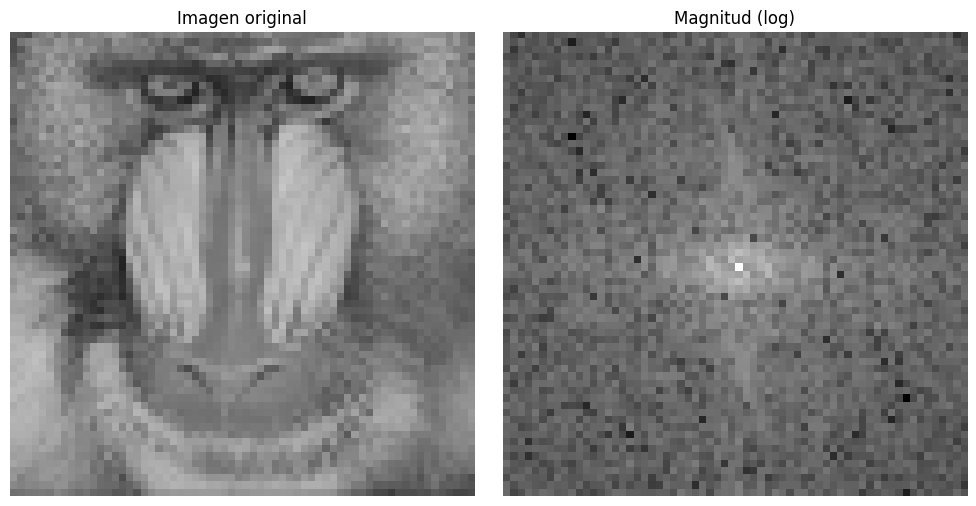

In [21]:
plot_FFT2D(average)